In [1]:
# dataset: https://www.kaggle.com/competitions/digit-recognizer/data 

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/handtyped_nn/train.csv')

In [5]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

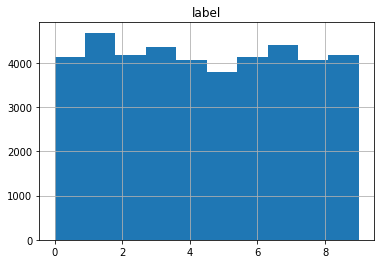

In [6]:
data.hist('label')

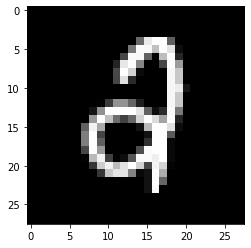

In [7]:
plt.imshow(data.values[10000][1:].reshape(28, 28), cmap='gray')

In [8]:
data.values[10000][:1]

array([2])

In [149]:
def split_data_1to1(data):
    test = data[::2]
    train = data[1::2]
    sns.displot(test['label'], bins=10, kde=True);
    sns.displot(train['label'], bins=10, kde=True);
    return test, train

def split_data_1to2(data):
    test = data[::3]
    train = pd.concat([data, test]).drop_duplicates(keep=False)
    sns.displot(test['label'], bins=10, kde=True);
    sns.displot(train['label'], bins=10, kde=True);
    return test, train

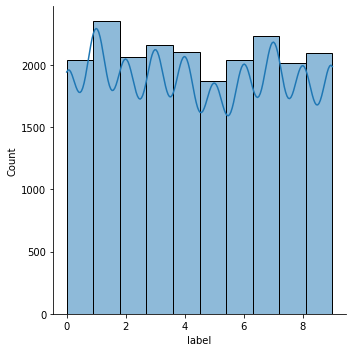

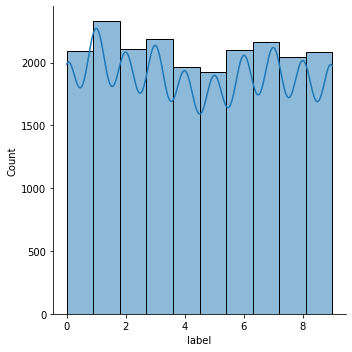

In [147]:
test, train = split_data_1to1(data)

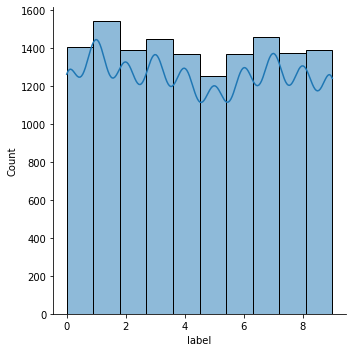

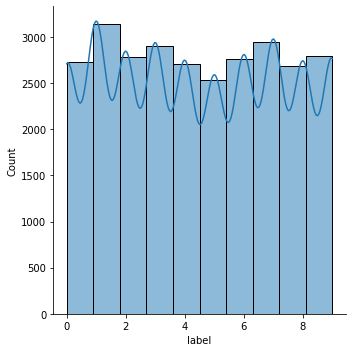

In [150]:
test, train = split_data_1to2(data)

In [316]:
class MyNN:
    def __init__(self):
        self.learn_rate = 0.01

        
        self._weights0 = np.random.rand(784, 49)*0.1 - 0.05
        self._weights1 = np.random.rand(49, 16)*0.1 - 0.05
        self._weights2 = np.random.rand(16, 10)*0.1 - 0.05

        self._input  = np.zeros([784])
        self._layer1 = np.zeros([49])
        self._layer2 = np.zeros([16])
        self._output = np.zeros([10])
        
        self._correction_0 = np.zeros([784, 49])
        self._correction_1 = np.zeros([49, 16])
        self._correction_2 = np.zeros([16, 10])
        
    def zero(self):
        self._input  = np.zeros([784])
        self._layer1 = np.zeros([49])
        self._layer2 = np.zeros([16])
        self._output = np.zeros([10])
    
    def act_sigmoid(self, layer):
        return np.array([1/(1+np.exp(-x)) for x in layer])

    def act_relu(self, layer):
        return np.array([x if x > 0 else 0 for x in layer])

    def der_act_sigmoid(self, l):
        _exp = np.exp(-l)
        return _exp / (1+_exp)**2
        
    def der_act_relu(self, l):
        return 1 if l > 0 else 0
    
    def predict(self, img):
        self.zero()
        self._input = img
        
        self._layer1 = np.dot(self._input, self._weights0)
        self._layer1 = self.act_sigmoid(self._layer1)
        
        self._layer2 = np.dot(self._layer1, self._weights1)
        self._layer2 = self.act_sigmoid(self._layer2)
        
        self._output = np.dot(self._layer2, self._weights2)
        self._output = self.act_sigmoid(self._output)
        
        return self._output
    
    def learn(self, labels):        
        main_delta   = self._output - labels
        delta_output = main_delta * [self.der_act_relu(x) for x in self._output]
        delta_w_2    = np.dot(delta_output.reshape(len(delta_output), 1),
                              self._layer2.reshape(1, len(self._layer2)))
        
        delta_layer2 = np.dot(self._weights2, delta_output) * [self.der_act_relu(x) for x in self._layer2]
        delta_w_1    = np.dot(delta_layer2.reshape(len(delta_layer2), 1),
                              self._layer1.reshape(1, len(self._layer1)))
        
        delta_layer1 = np.dot(self._weights1, delta_layer2) * [self.der_act_relu(x) for x in self._layer1]
        delta_w_0    = np.dot(delta_layer1.reshape(len(delta_layer1), 1),
                              self._input.reshape(1, len(self._input)))
        
        self._correction_0 += np.transpose(delta_w_0)
        self._correction_1 += np.transpose(delta_w_1)
        self._correction_2 += np.transpose(delta_w_2)
        
    def update(self):
        self._weights0 = self._weights0 - self.learn_rate * self._correction_0
        self._weights1 = self._weights1 - self.learn_rate * self._correction_1
        self._weights2 = self._weights2 - self.learn_rate * self._correction_2
        
        self._correction_0 = np.zeros([784, 49])
        self._correction_1 = np.zeros([49, 16])
        self._correction_2 = np.zeros([16, 10])
    
    def check_correct(self, test):
        correct = 0
        for i in range(len(test)):
            res = np.argmax(self.predict(test.values[i][1:]))
            if res == test.values[i][:1]:
                correct+=1
        return correct/len(test)
    
    def fit(self, test, train, epochs, learn_rate, batch):
        self.learn_rate = learn_rate
        for e in range(epochs):
            for i in range(len(train)):
                NN.predict( train.values[i][1:] )
                expect = [1 if k == train.values[i][:1] else 0 for k in range(10)]
                NN.learn(expect)
                if not i %batch:
                    NN.update()
            print("e{}, corr = {}".format(e, NN.check_correct(test)))

In [317]:
NN = MyNN()
NN.predict( data.values[1][1:] )

array([0.49544182, 0.49832285, 0.49316653, 0.47957319, 0.50247824,
       0.48991934, 0.50758159, 0.50037433, 0.51465704, 0.46651884])

In [318]:
NN.fit(test,
       train.sample(frac=1),
       epochs = 20,
       learn_rate = 0.01,
       batch = 10)

/tmp/ipykernel_4261/3217609892.py:26: RuntimeWarning: overflow encountered in exp
  return np.array([1/(1+np.exp(-x)) for x in layer])


e0, corr = 0.46564285714285714
e1, corr = 0.6022142857142857
e2, corr = 0.6482142857142857
e3, corr = 0.6619285714285714
e4, corr = 0.6887142857142857
e5, corr = 0.6849285714285714
e6, corr = 0.6701428571428572
e7, corr = 0.6622142857142858
e8, corr = 0.6598571428571428
e9, corr = 0.6618571428571428
e10, corr = 0.6746428571428571
e11, corr = 0.6617142857142857
e12, corr = 0.6697857142857143
e13, corr = 0.6462142857142857
e14, corr = 0.6558571428571428
e15, corr = 0.6626428571428571
e16, corr = 0.6663571428571429
e17, corr = 0.6682142857142858
e18, corr = 0.6800714285714285
e19, corr = 0.6861428571428572


In [298]:
#NN.predict( mixed_data.values[0][1:] )
#expect = [1 if k == mixed_data.values[0][:1] else 0 for k in range(10)]
#NN.learn(expect)
#NN.update()

/tmp/ipykernel_4261/3217609892.py:26: RuntimeWarning: overflow encountered in exp
  return np.array([1/(1+np.exp(-x)) for x in layer])


1 9 7 3 1 1 7 6 1 9 5 9 3 4 4 

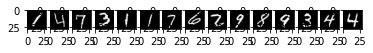

In [333]:
n = 15
fig, axes = plt.subplots(nrows = 1, ncols =n )
for i in range(n):
    print(np.argmax(NN.predict(test.values[i][1:])), end=' ')
    axes[i].imshow(test.values[i][1:].reshape(28, 28), cmap='gray')